# Demo of proximal gradient descent for the Lasso

Author : Alexandre Gramfort, INRIA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

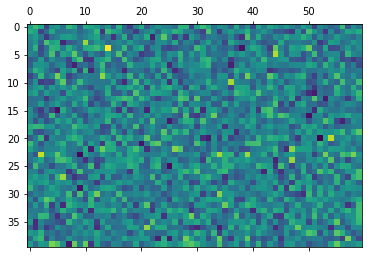

In [2]:
n, p = 40, 60
A = np.random.randn(n, p)
plt.matshow(A);

Generate some data:

In [3]:
x0 = np.zeros(p)
x0[10] = 30
x0[44] = -20
b = np.dot(A, x0)

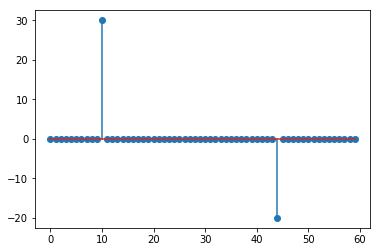

In [4]:
plt.stem(x0);

In [5]:
lambd = 100.

def f(x):
    return 0.5 * np.linalg.norm(b - np.dot(A, x)) ** 2

def pobj(z):
    return f(x) + lambd * np.sum(np.abs(x))

def grad_f(z):
    return - np.dot(A.T, b - np.dot(A, x))
            
def soft_thresh(x, rho):
    """Soft-thresholding operator
    
    Solves:
    
    0.5  * || x - y ||^2 + rho * lambd || x ||_1
    
    """
    return np.sign(x) * np.maximum(np.abs(x) - rho * lambd, 0)

Let's look at the effect of the soft-thresholding

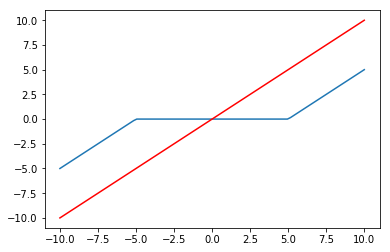

In [6]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, soft_thresh(xx, 0.05));
plt.plot(xx, xx, 'r');

Now write the iteration of the proximal gradient method:

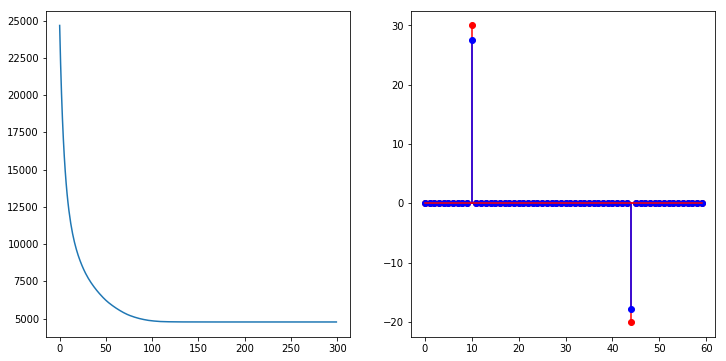

In [7]:
x = np.zeros(p)
rho = 0.001

all_pobj = []

for k in range(300):
    x = x - rho * grad_f(x)
    x = soft_thresh(x, rho)
    all_pobj.append(pobj(x))

f , (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1.plot(all_pobj);
ax2.stem(x0, linefmt='r-', markerfmt='ro', basefmt='r-');
ax2.stem(x, linefmt='b-', markerfmt='bo', basefmt='r-');